<a href="https://colab.research.google.com/github/Aditya-singh32/My_projects/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [87]:
# Standard Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Project Especific Imports
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [88]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

In [89]:
iris_data = iris_data[50:]
iris_target = iris_target[50:]

In [90]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1,input_shape=(1,), name='hidden_layer')
      , tf.keras.layers.Dense(1,name='output_layer')
      ])

  my_opt = tf.keras.optimizers.Adam(learning_rate=my_learning_rate)
  model.compile(optimizer="adam",
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs, validation_split=0.5, verbose=0)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0::2]
  trained_bias = model.get_weights()[1::2]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse, model

In [91]:
from sklearn.metrics import mean_squared_error

for var in range(4):
    my_feature = iris_data[:, var] #use sepal_length to predict the target, try all 3 by the way
    my_label = iris_data[:, 2] #target is petal_length

    learning_rate=.1
    epochs=100
    my_batch_size=5

    my_model = build_model(learning_rate)
    trained_weight, trained_bias, epochs, rmse, my_model = train_model(my_model, my_feature,
                                                            my_label, epochs,
                                                            my_batch_size)

    y_pred = my_model.predict(my_feature, verbose=0).flatten()
    print("Trained using column number =", var)
    print('rmse =', np.sqrt(mean_squared_error(my_label, y_pred)))
    print("Trained_weight (w1) =",trained_weight)
    print("Trained_bias (w0) =",trained_bias)
    print()

Trained using column number = 0
rmse = 0.7050660271198115
Trained_weight (w1) = [array([[0.4290863]], dtype=float32), array([[1.3838915]], dtype=float32)]
Trained_bias (w0) = [array([0.3219192], dtype=float32), array([0.2926004], dtype=float32)]

Trained using column number = 1
rmse = 5.533643871232266
Trained_weight (w1) = [array([[1.0462543]], dtype=float32), array([[-0.5932301]], dtype=float32)]
Trained_bias (w0) = [array([-0.68447596], dtype=float32), array([0.8301047], dtype=float32)]

Trained using column number = 2
rmse = 0.074388339919232
Trained_weight (w1) = [array([[0.82524395]], dtype=float32), array([[1.1234603]], dtype=float32)]
Trained_bias (w0) = [array([0.15019575], dtype=float32), array([0.14460301], dtype=float32)]

Trained using column number = 3
rmse = 0.6495352055194679
Trained_weight (w1) = [array([[1.6195776]], dtype=float32), array([[1.5596812]], dtype=float32)]
Trained_bias (w0) = [array([0.361444], dtype=float32), array([0.335506], dtype=float32)]



# Question 2

In [73]:
X_train,X_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size=.2,random_state=42)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(4,),name='hidden_layer'),
    tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer')
])

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics='accuracy')

model.fit(X_train,y_train,epochs=500,validation_split=.2,verbose=0)

In [76]:
hist = model.history.history
epoch = model.history.epoch

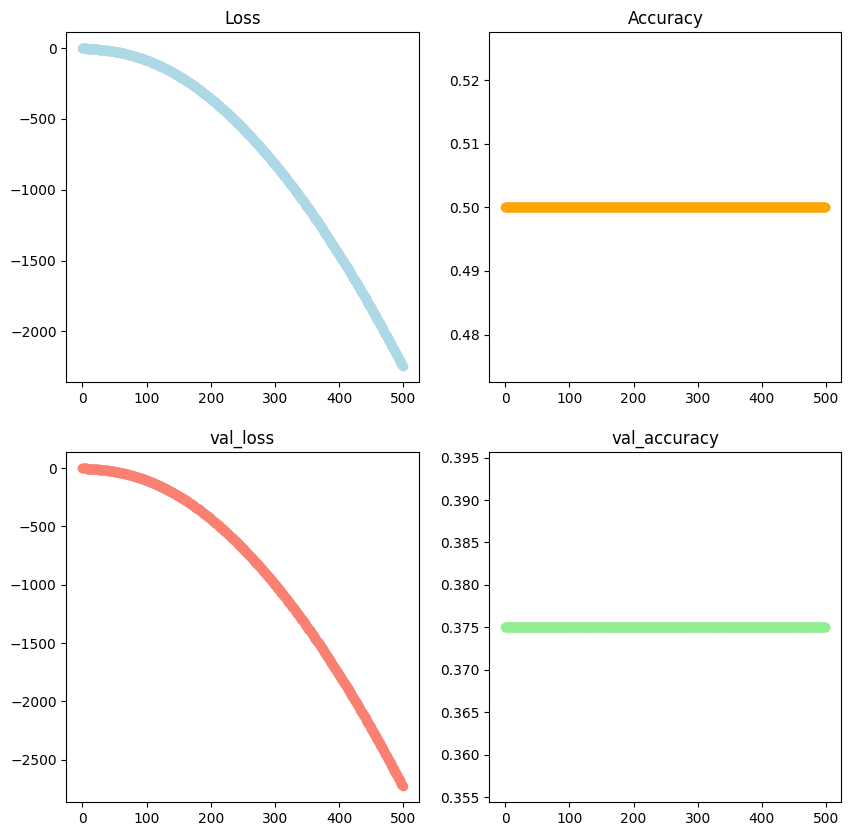

In [77]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(10,10))

ax0.scatter(epoch,hist['loss'],c='lightblue')
ax0.title.set_text('Loss')

ax1.scatter(epoch,hist['accuracy'],c='orange')
ax1.title.set_text('Accuracy')

ax2.scatter(epoch,hist['val_loss'],c='salmon')
ax2.title.set_text('val_loss')

ax3.scatter(epoch,hist['val_accuracy'],c='lightgreen')
ax3.title.set_text('val_accuracy')

In [78]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 100)               500       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


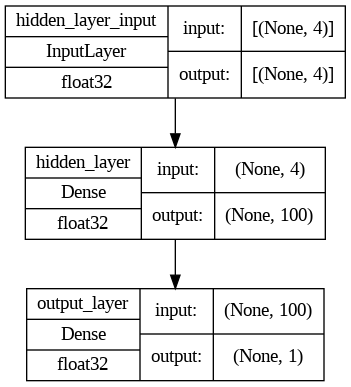

In [79]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_dtype=True)

In [80]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 16ms/step - loss: -1736.1439 - accuracy: 0.6000


[-1736.1439208984375, 0.6000000238418579]

In [81]:
# Access the weights of the first layer (hidden layer)
weights_hidden_layer, biases_hidden_layer = model.get_layer('hidden_layer').get_weights()

# Access the weights of the second layer (output layer)
weights_output_layer, biases_output_layer = model.get_layer('output_layer').get_weights()

print("Weights of hidden layer:", weights_hidden_layer)
print("Biases of hidden layer:", biases_hidden_layer)
print("Weights of output layer:", weights_output_layer)
print("Biases of output layer:", biases_output_layer)

Weights of hidden layer: [[ 1.5186832  1.6088165 -1.6054842 -1.4431993 -1.5230452 -1.5618203
   1.4711756  1.658587   1.736215  -1.4108902  1.5241222  1.7623857
  -1.3130038  1.6580999  1.6838467 -1.4581652  1.5501873  1.4848114
  -1.4127707  1.6520971 -1.6936826  1.4268748  1.4086382 -1.6235676
  -1.3945835 -1.3631871  1.5993593  1.64113    1.4534765 -1.5407258
   1.6649015  1.2814878 -1.3672991  1.4122037 -1.6140102  1.7070044
  -1.528465  -1.3896255 -1.451594  -1.5116006 -1.5692449 -1.3997127
  -1.6187797 -1.3496827  1.5751531  1.4632703 -1.5168818 -1.4779588
   1.3874624  1.252064  -1.7178316  1.3867115 -1.4180312 -1.4513757
  -1.7330354  1.608167  -1.7579683  1.4941304 -1.5540355  1.6628481
   1.6249847  1.5677037 -1.61966    1.525574  -1.386544   1.4061186
   1.5261871 -1.4896414  1.4204608  1.8090372  1.6093659 -1.7734716
  -1.5678215  1.4632165  1.5371081 -1.458086  -1.3248142 -1.5637838
   1.4128088  1.6001365  1.44583    1.350946  -1.3235564  1.5159229
   1.4014187 -1.3353969

In [83]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [84]:
from sklearn.metrics import f1_score
f1_score(y_test,y_preds)

0.7499999999999999

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75        12
           2       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.6